In [1]:
import os
os.environ['KERAS_BACKEND'] = 'theano'

In [2]:
from keras import backend as K

Using Theano backend.


In [3]:
K.backend()

'theano'

In [4]:
K.floatx()

'float32'

In [5]:
import numpy as np

with open('../../mnist/data/t10k-images-idx3-ubyte', 'rb') as f:
    x_data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

with open('../../mnist/data/t10k-labels-idx1-ubyte', 'rb') as f:
    y_data = np.frombuffer(f.read(), np.uint8, offset=8)

In [6]:
x_data.dtype, y_data.dtype

(dtype('uint8'), dtype('uint8'))

In [7]:
x_data.min(), x_data.max()

(0, 255)

In [8]:
x_test = x_data[:1000] / 255
y_test = np.eye(10)[y_data[:1000]]

x_train = x_data[1000:] / 255
y_train = np.eye(10)[y_data[1000:]]

In [9]:
x_train.dtype, y_train.dtype

(dtype('float64'), dtype('float64'))

In [10]:
x_test = x_test.astype(K.floatx())
y_test = y_test.astype(K.floatx())

x_train = x_train.astype(K.floatx())
y_train = y_train.astype(K.floatx())

In [11]:
# Keras로 5층 인공신경망 만들고 훈련.

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=100, input_dim=28 * 28, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32)
# -> New MacBook 기준으로 Theano backend가 TensorFlow backend보다 빠르다.

Epoch 1/10
9000/9000 [==============================] - 1s - loss: 1.9995 - acc: 0.3301     
Epoch 2/10
9000/9000 [==============================] - 2s - loss: 0.9767 - acc: 0.7293     
Epoch 3/10
9000/9000 [==============================] - 3s - loss: 0.5537 - acc: 0.8437     
Epoch 4/10
9000/9000 [==============================] - 3s - loss: 0.4270 - acc: 0.8752     
Epoch 5/10
9000/9000 [==============================] - 3s - loss: 0.3635 - acc: 0.8956     
Epoch 6/10
9000/9000 [==============================] - 2s - loss: 0.3182 - acc: 0.9073     
Epoch 7/10
9000/9000 [==============================] - 2s - loss: 0.2864 - acc: 0.9166     
Epoch 8/10
9000/9000 [==============================] - 2s - loss: 0.2616 - acc: 0.9236     
Epoch 9/10
9000/9000 [==============================] - 2s - loss: 0.2374 - acc: 0.9309     
Epoch 10/10
9000/9000 [==============================] - 2s - loss: 0.2205 - acc: 0.9351     


In [12]:
# batch로 training을 직접할 때는 다음과 같이 한다.

x_batch = x_train[:100]
y_batch = y_train[:100]
model.train_on_batch(x_batch, y_batch)
# -> TensorFlow backend와 Theano backend의 결과가 다르다.

[array(0.28541094064712524, dtype=float32),
 array(0.8999999761581421, dtype=float32)]

In [13]:
# 모델 검증

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
accuracy

 896/1000 [=========================>....] - ETA: 0s

0.92800000000000005

In [14]:
# 예측 = 솔글씨 이미지 인식

classes = model.predict(x_test, batch_size=128)
np.argmax(classes, axis=1)[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

ready...
--------------------------------------------------------------------------------


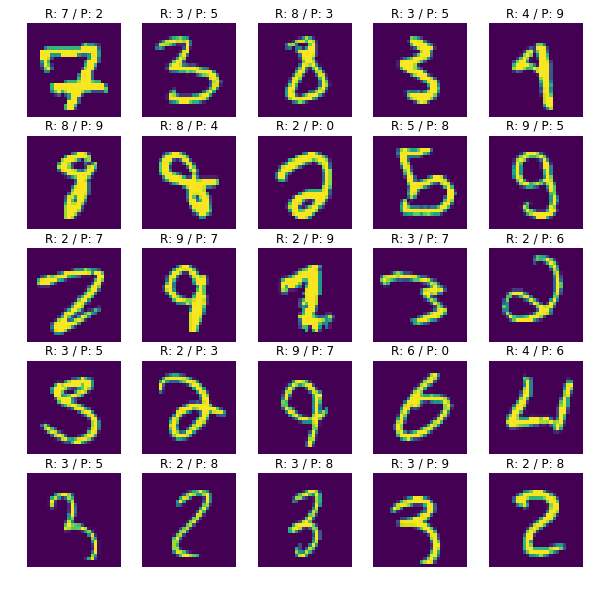

In [15]:
# 오답 시각화

import matplotlib.pyplot as plt

predict = np.argmax(classes, axis=1)
correct = predict == y_data[:1000]

indices = np.arange(1000)[~correct]
np.random.shuffle(indices)

print('ready...')
print('-' * 80)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in zip(indices[:25], axes.flat):
    ax.set_axis_off()
    ax.imshow(x_data[i].reshape(28, 28))
    ax.set_title('R: {} / P: {}'.format(y_data[i], predict[i]))

plt.show()